
# Animations of 3D rotation and different network topologies using maplotlib
Examples of 3D plots of a graph in the 3D spectral layout with animation.
Following
https://sphinx-gallery.github.io/stable/auto_examples/plot_8_animations.html
using frame rotation of an initial plot of a graph as in
https://matplotlib.org/stable/api/animation_api.html
or complete frame redraw to plot a random walk on the graph.

The commented out line with 'plt.show()' needs to be commented back in
in both examples when running locally.


In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import numpy as np
import random
from matplotlib.animation import FuncAnimation

## Define a parameters, logic for network topologies


In [12]:
# Parameters dictionary
params = {
    "num_nodes": 50,
    "initial_infected": 3,
    "spread_chance": 0.1,
    "recovery_chance": 0.02,
    "network_type": "powerlaw_cluster",  # Added "powerlaw_cluster" as an option
    "erdos_renyi_p": 0.1,          # Probability for Erdős-Rényi
    "barabasi_albert_m": 2,        # Number of edges to attach for Barabási-Albert
    "watts_strogatz_k": 4,         # Each node is connected to k neighbors in Watts-Strogatz
    "watts_strogatz_p": 0.1,       # Rewiring probability for Watts-Strogatz
    "powerlaw_cluster_m": 2,       # Number of edges to attach for Powerlaw-Cluster
    "powerlaw_cluster_p": 0.3      # Probability of adding a triangle for Powerlaw-Cluster
}

# Create the graph based on the selected topology
if params["network_type"] == "erdos_renyi":
    G = nx.erdos_renyi_graph(params["num_nodes"], params["erdos_renyi_p"])
elif params["network_type"] == "barabasi_albert":
    G = nx.barabasi_albert_graph(params["num_nodes"], params["barabasi_albert_m"])
elif params["network_type"] == "watts_strogatz":
    G = nx.watts_strogatz_graph(params["num_nodes"], params["watts_strogatz_k"], params["watts_strogatz_p"])
elif params["network_type"] == "powerlaw_cluster":
    G = nx.powerlaw_cluster_graph(params["num_nodes"], params["powerlaw_cluster_m"], params["powerlaw_cluster_p"])
else:
    raise ValueError("Invalid network type specified in params.")

In [13]:
# Generate 3D positions for nodes
pos = nx.spring_layout(G, dim=3)
nodes = np.array([pos[node] for node in G.nodes])

# Initialize node states
states = {node: 'S' for node in G.nodes}  # 'S' = Susceptible, 'I' = Infected, 'R' = Recovered
for node in random.sample(list(G.nodes), params["initial_infected"]):
    states[node] = 'I'

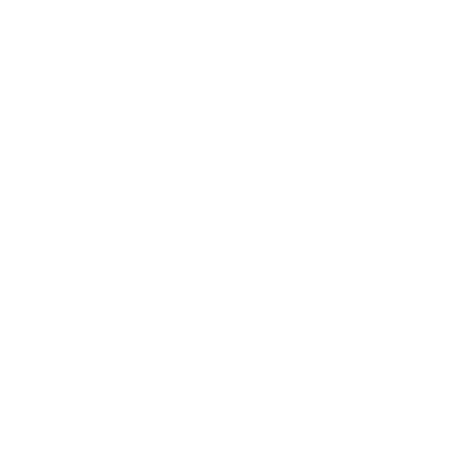

MovieWriter Pillow unavailable; using Pillow instead.


In [14]:
# Update function for the simulation
def update_states():
    global states
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 'I':  # Infected
            # Try to infect neighbors
            for neighbor in G.neighbors(node):
                if states[neighbor] == 'S' and random.random() < params["spread_chance"]:
                    new_states[neighbor] = 'I'
            # Try to recover
            if random.random() < params["recovery_chance"]:
                new_states[node] = 'R'
    states = new_states  # Update the global states dictionary

# Frame update function for animation
def _frame_update(frame):
    global ani
    update_states()
    ax.clear()
    ax.set_axis_off()
    ax.grid(False)

    # Draw edges
    for edge in G.edges:
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color="gray", alpha=0.5)

    # Draw nodes
    for node in G.nodes:
        x, y, z = pos[node]
        if states[node] == 'S':  # Susceptible
            color = "blue"
        elif states[node] == 'I':  # Infected
            color = "red"
        elif states[node] == 'R':  # Recovered
            color = "green"
        ax.scatter(x, y, z, color=color, s=50, alpha=1)

    ax.view_init(elev=20, azim=frame * 0.5)  # Rotate the view slightly for each frame

    # Stop the animation if all nodes are recovered
    if all(state == 'R' for state in states.values()):
        ani.event_source.stop()

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_axis_off()
plt.tight_layout()

# Create the animation
ani = FuncAnimation(fig, _frame_update, frames=200, interval=100)

# Uncomment the line below to display the animation
plt.show()

# Uncomment the line below to save the animation as a video (requires ffmpeg or Pillow)
ani.save("/Users/valentinbast/uni/AngewandteSys1/group_project/3D-plotting/holm-kim/sir_model_3d.gif", writer="Pillow", fps=30)